# BANK MARKETING

## Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
### About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
**Dataset Attributes**


Here is the description of all the variables:

-	Variable: Definition
-	ID: Unique client ID
-	age: Age of the client
-	job: Type of job
-	marital: Marital status of the client
-	education: Education level
-	default: Credit in default.
-	housing: Housing loan
-	loan: Personal loan
-	contact: Type of communication
-	month: Contact month
-	day_of_week: Day of week of contact
-	duration: Contact duration
-	campaign: number of contacts performed during this campaign to the client
-	pdays: number of days that passed by after the client was last contacted
-	previous: number of contacts performed before this campaign
-	poutcome: outcome of the previous marketing campaign

Output variable (desired target):

- Subscribed (target): has the client subscribed a term deposit? (YES/NO)


### Dataset Link-

-	https://github.com/dsrscientist/dataset5
-	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
-	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv


In [59]:
# # Import important liberabry
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Importaning the dataset
df_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
# First first data
df_train.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [61]:
# Importaning the dataset
df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
# First first data
df_test.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [62]:
df_train.shape

(31647, 18)

shape is 31647 row and 18 columns in which 1 is label

In [63]:
df_test.shape

(13564, 17)

shape is 13564 row and 17 columns

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


There is total 31647 entries and 18 columns,int64(8), object(10) and consume memory 4.32M.B

In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


There is total 13564 entries and 17 columns,int64(8), object(9) and consume memory 1.8 M.B



In [66]:
# Checking columns
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [67]:
df_train.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

No null values

In [68]:
df_test.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

No. null values

In [69]:
df_train.nunique().to_frame()

,0
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


Balance, duration and Pdays are continues labels

In [70]:
df_test.nunique().to_frame()

,0
ID,13564
age,75
job,12
marital,3
education,4
default,2
balance,4292
housing,2
loan,2
contact,3


In [71]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1.All column have 31647 values so no missing values.

2.The std is more than 10 % of mean there might be outliers

- Age
- Balance
- Duration
- Campaign
- pdays
- previous

3.The difference between min,25%,50%,75% and max is uneven in the following

- Age
- Balance
- Duration
- Campaign
- pdays
- previous

4.The mean value is greater than the median (50%) which means the data is skewed to right in these column.

- age
- balance
- Duration
- Campaign
- pday
- previous
5.The mean value is Less than the median (50%) which means the data is skewed to left in these column.

- day

We only analysis continues variable not the categorical one

In [72]:
# droping the Id column as it is not useful in analysis
df_train=df_train.drop('ID',axis=1)
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [73]:
# droping the Id column as it is not useful in analysis
df_test=df_test.drop('ID',axis=1)
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [74]:
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

Dataset is imbalance

## Graphical Analysis

In [75]:
df1 = df_train.select_dtypes(include='int64').columns
df1
df2 = df_train.select_dtypes(include='object').columns
df2

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

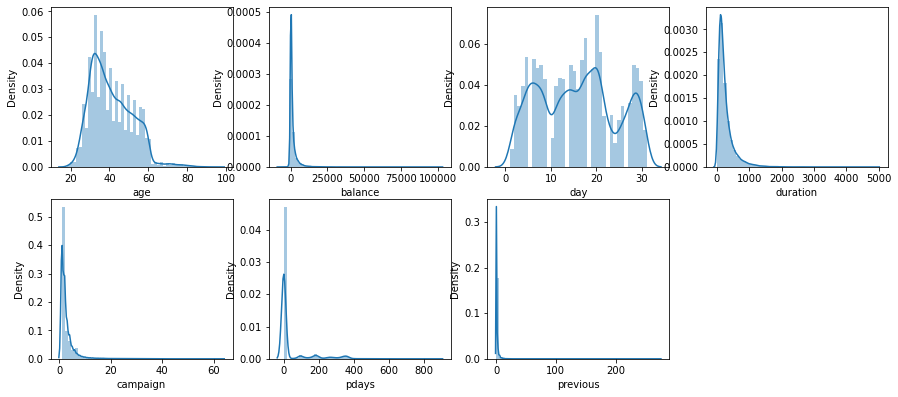

In [76]:
plt.figure(figsize=(15, 10))
j=1
for i in df1:
    if j <=10:
        ax=plt.subplot(3,4,j)
        sns.distplot(x=df_train[i])
        plt.xlabel(i)
    j+=1
plt.show()


AS we can see in graph age,balance,duration,campaign,pdays and previous are right skewed

### Bivarient analysis

<AxesSubplot:xlabel='subscribed', ylabel='age'>

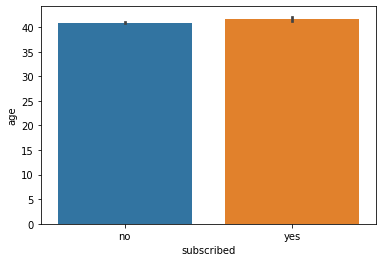

In [77]:
sns.barplot(y=df_train['age'],x=df_train['subscribed'])


Almost same

<AxesSubplot:xlabel='subscribed', ylabel='day'>

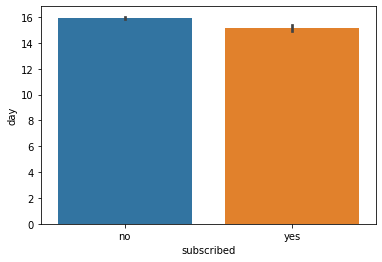

In [78]:
sns.barplot(y=df_train['day'],x=df_train['subscribed'])

Almost same

<AxesSubplot:xlabel='subscribed', ylabel='day'>

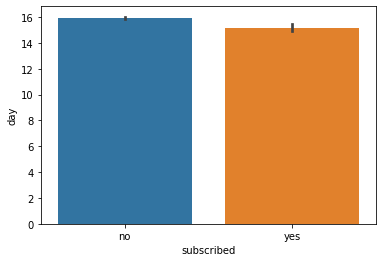

In [79]:
sns.barplot(y=df_train['day'],x=df_train['subscribed'])


Almost same

<AxesSubplot:xlabel='subscribed', ylabel='duration'>

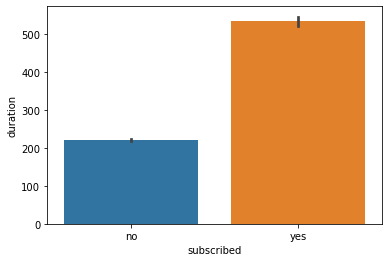

In [80]:
sns.barplot(y=df_train['duration'],x=df_train['subscribed'])



Yes is high compare to no.

<AxesSubplot:xlabel='subscribed', ylabel='pdays'>

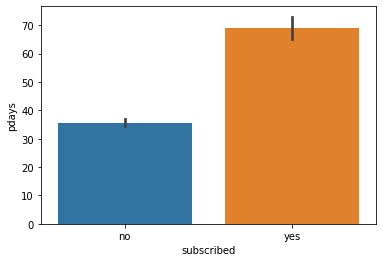

In [81]:
sns.barplot(y=df_train['pdays'],x=df_train['subscribed'])



more the pdays more is the yes to subscribe

<AxesSubplot:xlabel='subscribed', ylabel='campaign'>

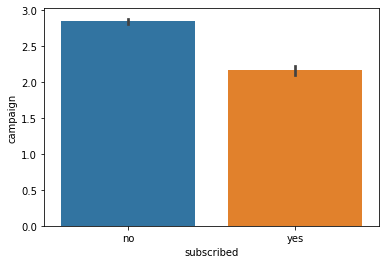

In [82]:
sns.barplot(y=df_train['campaign'],x=df_train['subscribed'])



more the campaign less is the yes to subscribe

<AxesSubplot:xlabel='subscribed', ylabel='previous'>

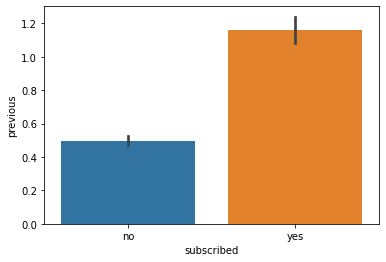

In [83]:
sns.barplot(y=df_train['previous'],x=df_train['subscribed'])

more the previous more is the yes to subscribe

### Mutlivarient Analysis

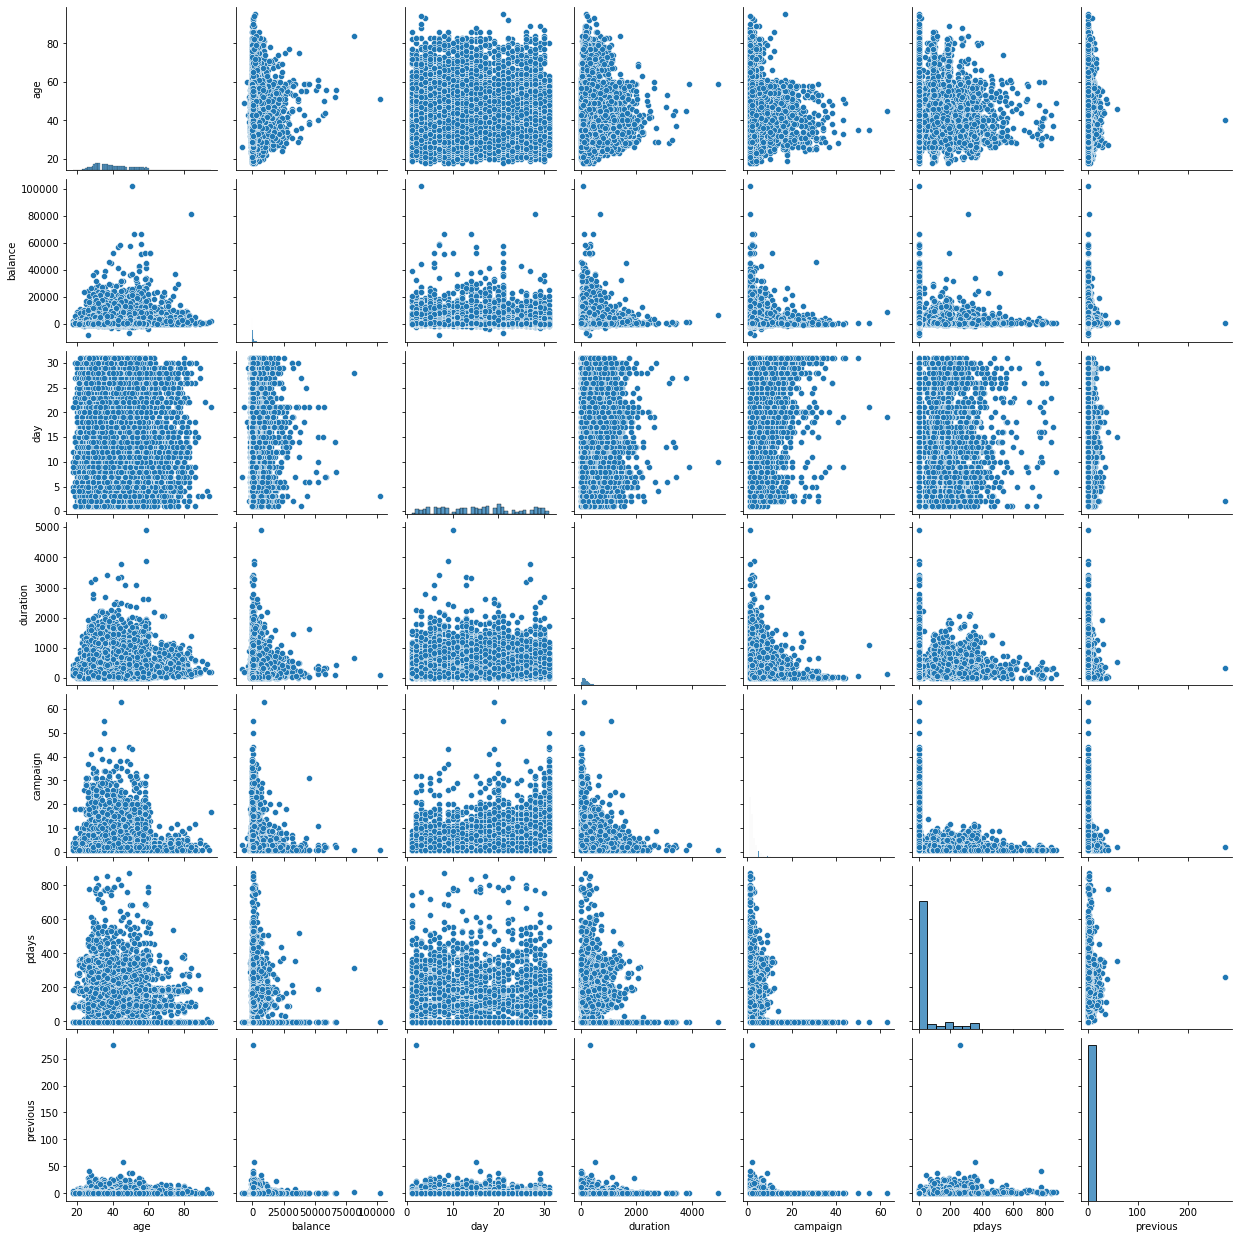

In [84]:
sns.pairplot(df_train[df1])

balance and pdays have some negative trend
balance have some relation with other feature

### Checking outliers

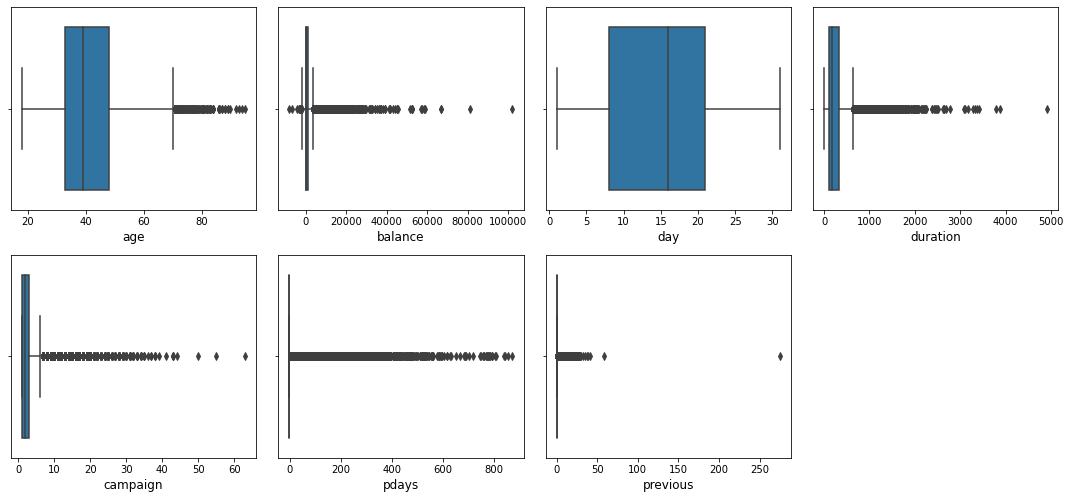

In [85]:

plt.figure(figsize=(15,10),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df_train[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Outiers in training dataset

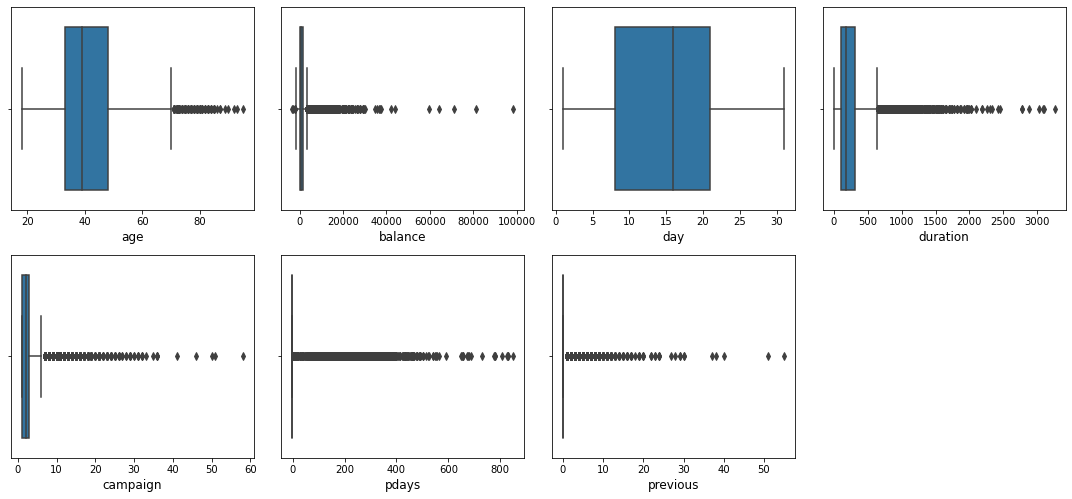

In [86]:

plt.figure(figsize=(15,10),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df_test[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Outliers in test dataset

### Treating outliers

#### Z-score

In [87]:
# for training splitiing label and features
x=df_train.drop('subscribed',axis=1)
y=df_train['subscribed']

#### Removed outliers from training data

In [88]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x[df1]))
z.shape

(31647, 7)

In [89]:
Threshold = 3
outlier_indices = np.where(z > 3)[0]

In [90]:

df3 = x.loc[~np.isin(np.arange(len(x)), outlier_indices)]
print(x.shape)
print(df3.shape)

(31647, 16)
(28124, 16)


In [91]:
y = y.loc[~np.isin(np.arange(len(y)), outlier_indices)]
print(y.shape)


(28124,)


In [99]:
df_train=df3

In [100]:
df_train['subscribed']=y
df_train.shape

(28124, 17)

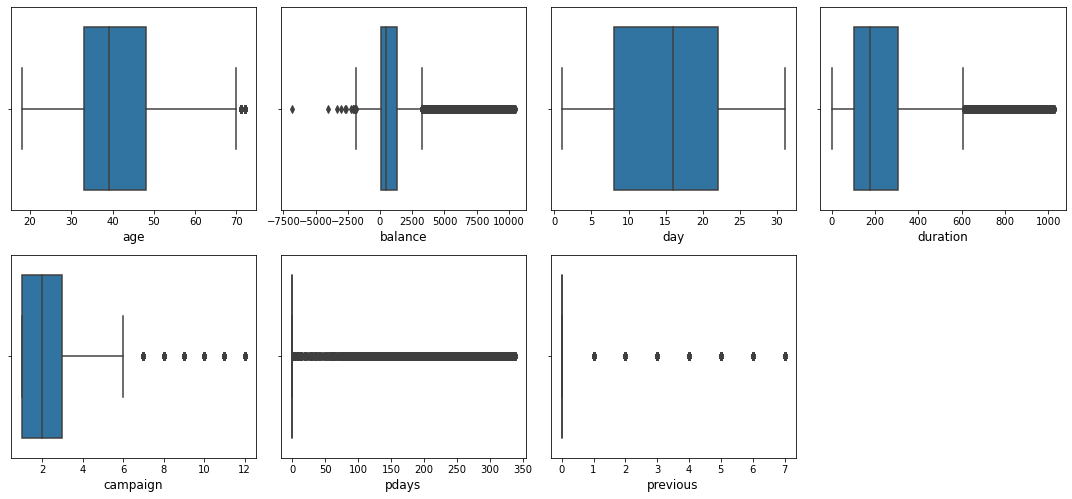

In [102]:

plt.figure(figsize=(15,10),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df_train[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [118]:
(x.shape[0]-df3.shape[0])/x.shape[0]

0.11132176825607483

#### Removed outliers from test data.

In [93]:
# For test data
z=np.abs(zscore(df_test[df1]))
z.shape

(13564, 7)

In [94]:
Threshold = 3
outlier_indices = np.where(z > 3)[0]

In [98]:
df4 = df_test.loc[~np.isin(np.arange(len(df_test)), outlier_indices)]
print(df_test.shape)
print(df4.shape)

(13564, 16)
(12034, 16)


In [103]:
df_test=df4
df_test.shape

(12034, 16)

### correlation

In [104]:
# Checking the correlation
df_train.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.093000,-0.009937,-0.026878,0.036362,-0.010143,0.007225
balance,0.093000,1.000000,0.008030,0.031060,-0.014948,0.042581,0.053219
day,-0.009937,0.008030,1.000000,-0.027286,0.131979,-0.056337,-0.049292
duration,-0.026878,0.031060,-0.027286,1.000000,-0.071903,0.011667,0.015065
campaign,0.036362,-0.014948,0.131979,-0.071903,1.000000,-0.086074,-0.064351
pdays,-0.010143,0.042581,-0.056337,0.011667,-0.086074,1.000000,0.717864
previous,0.007225,0.053219,-0.049292,0.015065,-0.064351,0.717864,1.000000


<AxesSubplot:>

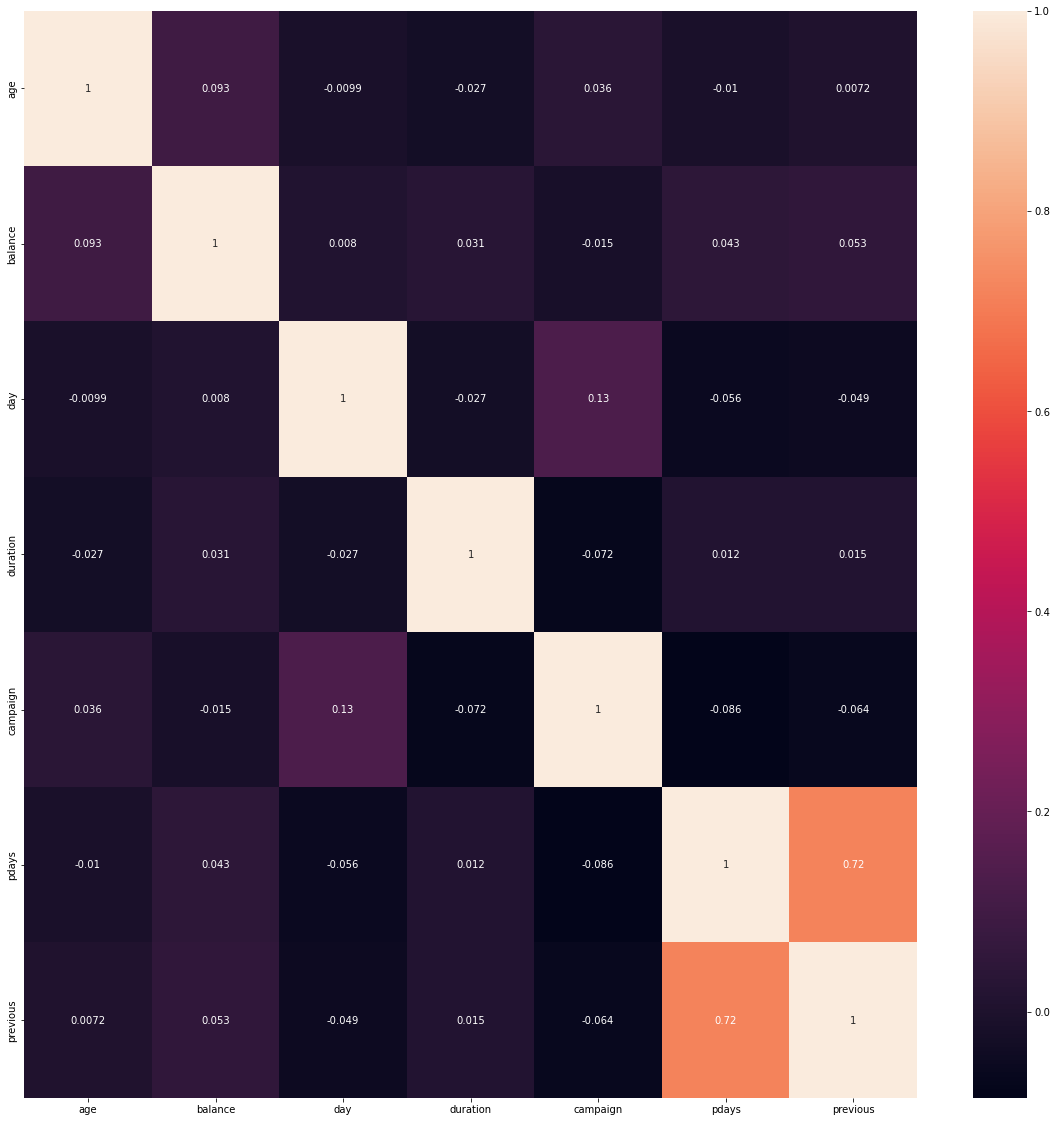

In [105]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True)

pday is highly correlated to previous

### Encoding

In [107]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [108]:
df_train.nunique().to_frame()

,0
age,55
job,12
marital,3
education,4
default,2
balance,5697
housing,2
loan,2
contact,3
day,31


In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
lab_enc=LabelEncoder()

In [113]:
# Encoding the train test
for i in df_train.columns:
    if df_train[i].nunique()<13:
        if df_train[i].dtypes=='object':
            df_train[i]=lab_enc.fit_transform(df_train[i])
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 31644
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         28124 non-null  int64
 1   job         28124 non-null  int32
 2   marital     28124 non-null  int32
 3   education   28124 non-null  int32
 4   default     28124 non-null  int32
 5   balance     28124 non-null  int64
 6   housing     28124 non-null  int32
 7   loan        28124 non-null  int32
 8   contact     28124 non-null  int32
 9   day         28124 non-null  int64
 10  month       28124 non-null  int32
 11  duration    28124 non-null  int64
 12  campaign    28124 non-null  int64
 13  pdays       28124 non-null  int64
 14  previous    28124 non-null  int64
 15  poutcome    28124 non-null  int32
 16  subscribed  28124 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 2.8 MB


In [115]:
# Encoding the train test
for i in df_test.columns:
    if df_test[i].nunique()<13:
        if df_test[i].dtypes=='object':
            df_test[i]=lab_enc.fit_transform(df_test[i])
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
5,32,4,2,2,0,0,1,0,0,22,5,455,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,32,9,2,1,0,129,1,0,0,7,8,213,1,-1,0,3
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3


In [116]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12034 entries, 0 to 13562
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        12034 non-null  int64
 1   job        12034 non-null  int32
 2   marital    12034 non-null  int32
 3   education  12034 non-null  int32
 4   default    12034 non-null  int32
 5   balance    12034 non-null  int64
 6   housing    12034 non-null  int32
 7   loan       12034 non-null  int32
 8   contact    12034 non-null  int32
 9   day        12034 non-null  int64
 10  month      12034 non-null  int32
 11  duration   12034 non-null  int64
 12  campaign   12034 non-null  int64
 13  pdays      12034 non-null  int64
 14  previous   12034 non-null  int64
 15  poutcome   12034 non-null  int32
dtypes: int32(9), int64(7)
memory usage: 1.1 MB


#### VIF

In [127]:
x1=df_train.drop('subscribed',axis=1)
y1=df_train['subscribed']

In [128]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x1.values,i)for i in range(len(x1.columns))]
vif['Features']=x1.columns


vif

,VIF values,Features
0,15.475734,age
1,2.836013,job
2,4.995296,marital
3,3.801827,education
4,1.037264,default
5,1.457999,balance
6,2.542689,housing
7,1.221806,loan
8,2.035146,contact
9,4.547639,day


For train data

VIF between 1 and 5: Moderate multicollinearity but age, month and poutcome have high colineraity

In [129]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df_test.values,i)for i in range(len(df_test.columns))]
vif['Features']=df_test.columns

vif

,VIF values,Features
0,15.175650,age
1,2.844334,job
2,4.887249,marital
3,3.792529,education
4,1.033037,default
5,1.451936,balance
6,2.571766,housing
7,1.214117,loan
8,2.007755,contact
9,4.587612,day


For test data

VIF between 1 and 5: Moderate multicollinearity but age, month and poutcome have high colineraity

### PCA

#### Training dataset

In [130]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x1)

array([[ 8.49189133e+02, -1.94903636e+02, -2.61391180e+01, ...,
        -1.43134053e-01, -1.51756862e-02, -1.52403830e-02],
       [-1.08064577e+03, -1.41140259e+02, -2.29556684e+01, ...,
        -1.83042483e-01, -8.07518089e-02, -2.73726020e-02],
       [-1.92136764e+02,  4.77181090e+00, -2.51293822e+01, ...,
        -2.13652947e-01, -8.11816323e-02, -1.32674678e-02],
       ...,
       [-1.08356034e+03, -1.16116438e+02, -2.30096871e+01, ...,
        -2.10160126e-01, -4.86656334e-02, -1.92473097e-02],
       [-7.02430478e+02,  2.04523380e+02, -2.50959042e+01, ...,
         5.83082450e-01,  5.35719129e-01, -5.72780515e-02],
       [-7.71836491e+02, -1.96202596e+02, -2.31552598e+01, ...,
        -9.84643736e-02, -6.19929651e-02, -2.07204834e-02]])

### Scree plot

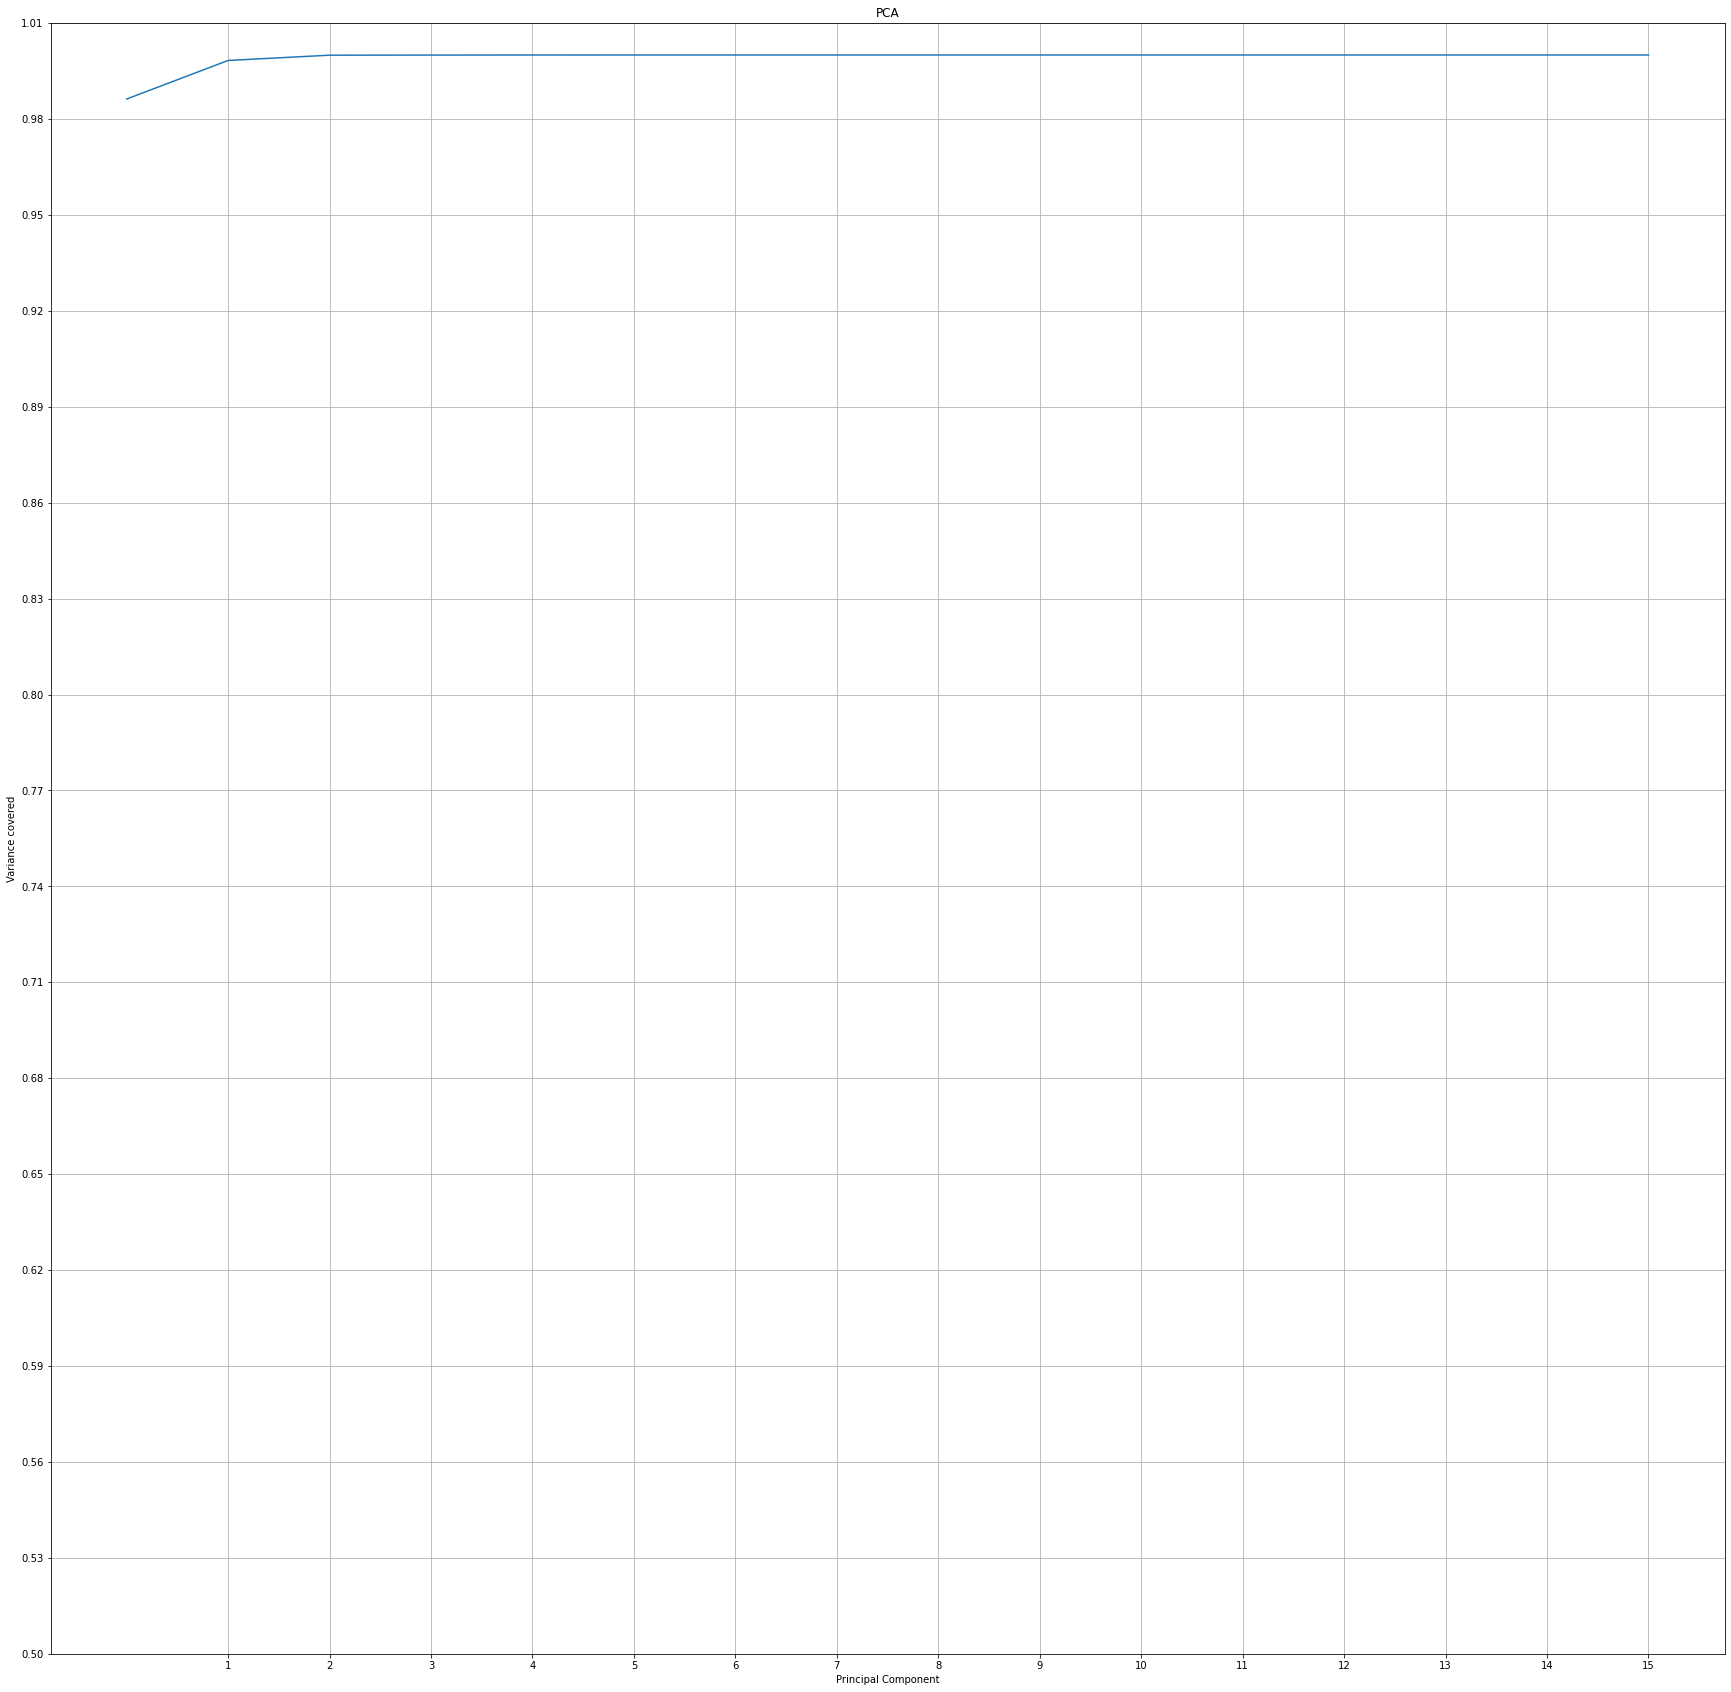

In [131]:
plt.figure(figsize=(30,30))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # np.cumsum is for cumulative of all.
plt.xlabel('Principal Component')
plt.grid('both')
plt.yticks(np.arange(0.5,1.03,0.03))
plt.xticks(range(1,16,1))
plt.ylabel('Variance covered')
plt.title("PCA")
plt.show()


As from the graph we can see 3 component can cover more than 99.5% of the data.

In [132]:
pca=PCA(n_components=3)
new_pcom=pca.fit_transform(x1)

In [133]:
x2=pd.DataFrame(new_pcom,columns=['PC1','PC2','PC3'])
x2

,PC1,PC2,PC3
0,849.189133,-194.903636,-26.139118
1,-1080.645770,-141.140259,-22.955668
2,-192.136764,4.771811,-25.129382
3,2206.190733,623.733937,52.876810
4,-963.642172,147.470428,-24.325290
...,...,...,...
28119,1884.125321,-212.493483,-27.847440
28120,226.567797,205.309081,-26.700046
28121,-1083.560343,-116.116438,-23.009687
28122,-702.430478,204.523380,-25.095904


x2 is features data y1 is label

#### Test data

In [134]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(df_test)

array([[-9.69309263e+02, -2.12516082e+02, -2.54940533e+01, ...,
         7.30753461e-02, -2.71955043e-01, -3.00851879e-02],
       [-9.40986990e+02,  4.43376135e+02, -2.99052914e+01, ...,
        -2.47689575e-02, -1.03458075e-01, -2.22298354e-02],
       [ 2.68983601e+03, -1.80535987e+02, -3.17012977e+01, ...,
         1.06950232e-01, -1.16615755e-01,  1.27297214e-03],
       ...,
       [ 1.19417550e+03, -8.22288037e+01, -2.99725777e+01, ...,
         4.55688399e-02, -1.70176259e-01, -6.63400181e-03],
       [-8.01897170e+02, -9.71237242e+01, -2.66496023e+01, ...,
         9.22408998e-02, -2.85335759e-01, -1.91222773e-02],
       [-6.22498474e+02, -2.51277937e+01,  6.47941909e+01, ...,
         6.88907956e-01, -8.24377175e-02, -2.65979007e-02]])

### Scree plot

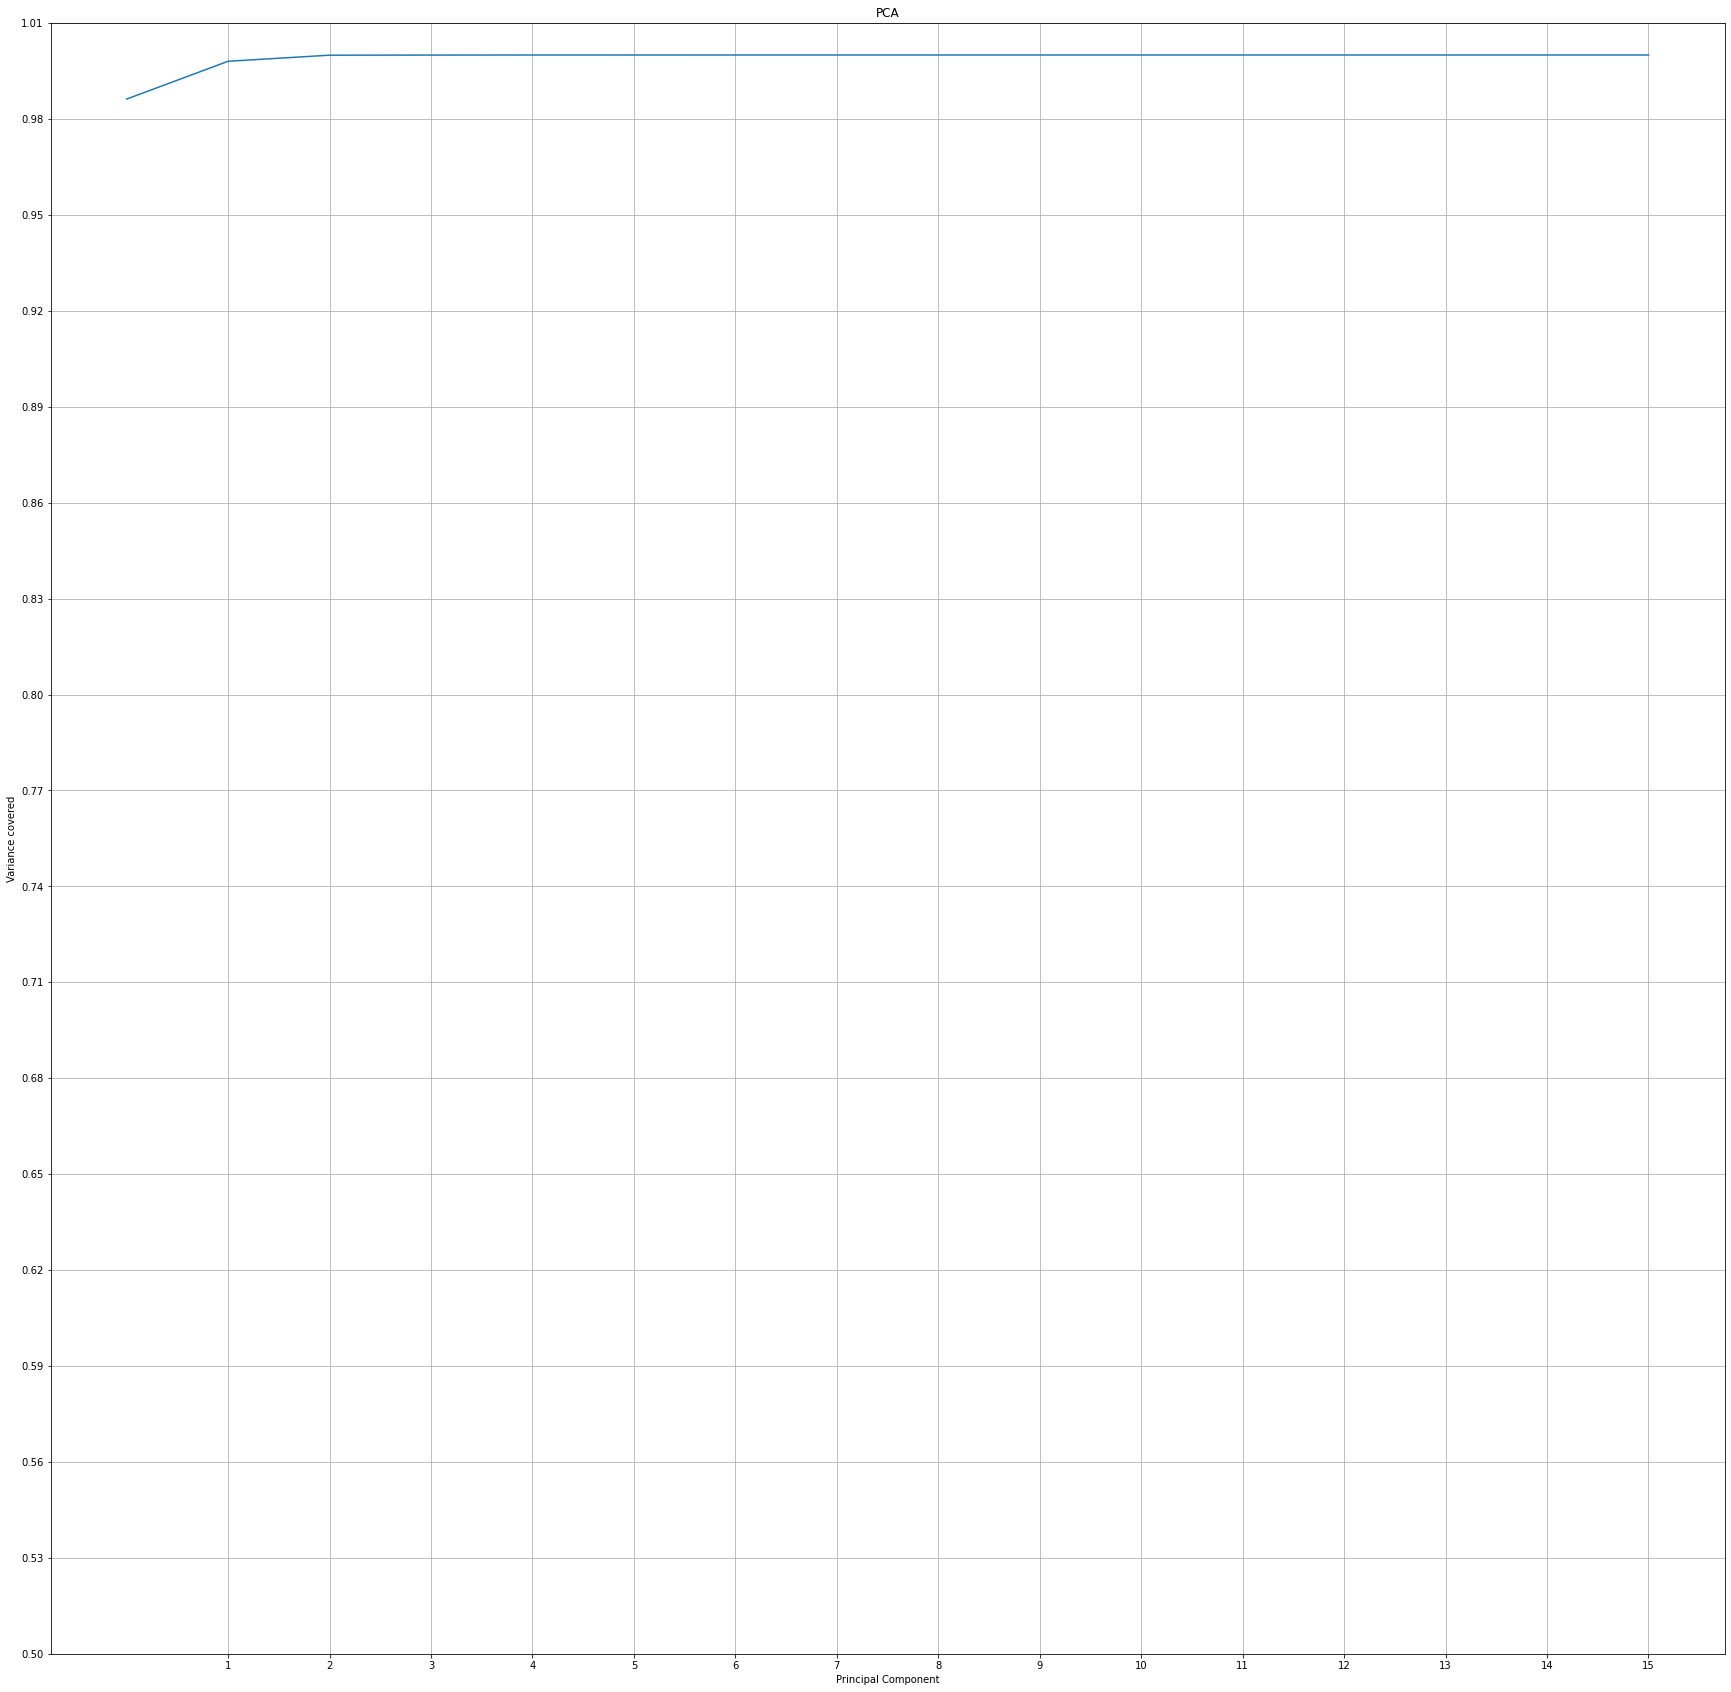

In [135]:
plt.figure(figsize=(30,30))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # np.cumsum is for cumulative of all.
plt.xlabel('Principal Component')
plt.grid('both')
plt.yticks(np.arange(0.5,1.03,0.03))
plt.xticks(range(1,16,1))
plt.ylabel('Variance covered')
plt.title("PCA")
plt.show()

As from the graph we can see 3 component can cover more than 99.5% of the data

In [136]:
pca=PCA(n_components=3)
new_pcom=pca.fit_transform(df_test)

In [189]:
df_test=pd.DataFrame(new_pcom,columns=['PC1','PC2','PC3'])
df_test

,PC1,PC2,PC3
0,-969.309263,-212.516082,-25.494053
1,-940.986990,443.376135,-29.905291
2,2689.836012,-180.535987,-31.701298
3,-1791.974273,-118.599127,-24.695089
4,-1085.767603,222.887204,-28.250011
...,...,...,...
12029,-957.626383,-19.549651,-26.714259
12030,-1041.850787,-84.278631,-26.349039
12031,1194.175503,-82.228804,-29.972578
12032,-801.897170,-97.123724,-26.649602


## df_test is final test file

### Oversampling

In [138]:
y1.value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

In [191]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x,y=SM.fit_resample(x2,y1)

In [192]:
y.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

In [194]:
x.shape

(50528, 3)

### Modeling

#### Find the best random state

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.733557622534468 at random_state 132


In [196]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [197]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [198]:
training_score = []
testing_score = []

In [199]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 72.17902683140603
Accuracy_Score of LogisticRegression() model on Testing Data is: 73.3557622534468

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7544551562956471
Recall Score of LogisticRegression() model is: 0.6865612122823341
F1 Score of LogisticRegression() model is: 0.7189087619180179

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


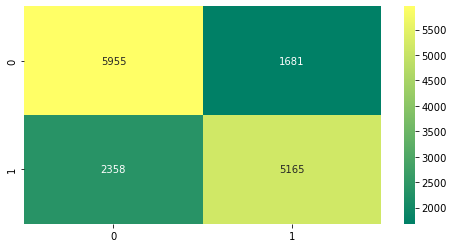

In [200]:
model_prediction(LogisticRegression())

Accuracy_Score of SVC() model on Training Data is: 73.6096581752382
Accuracy_Score of SVC() model on Testing Data is: 74.8202388020318

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.7440084277060838
Recall Score of SVC() model is: 0.7510301741326598
F1 Score of SVC() model is: 0.7475028114043791

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


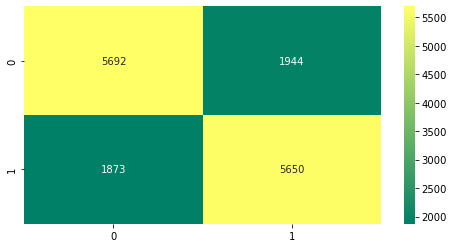

In [201]:
model_prediction(SVC())

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 82.83527937199024

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.8133197504138546
Recall Score of DecisionTreeClassifier() model is: 0.8489964110062475
F1 Score of DecisionTreeClassifier() model is: 0.8307752341311135

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


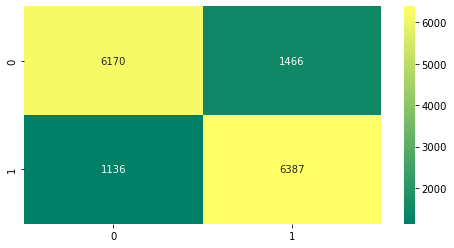

In [202]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 86.1468434593311

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8372931956711034
Recall Score of RandomForestClassifier() model is: 0.8947228499268909
F1 Score of RandomForestClassifier() model is: 0.8650559054106156

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


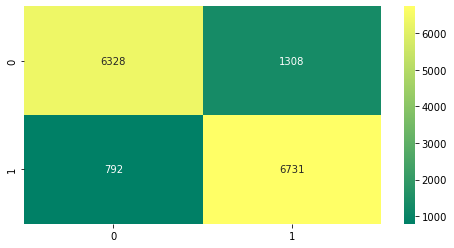

In [203]:
model_prediction(RandomForestClassifier())

Accuracy_Score of ExtraTreesClassifier() model on Training Data is: 100.0
Accuracy_Score of ExtraTreesClassifier() model on Testing Data is: 86.60861534402005

------------------------------------------------------------------------
Precision Score of ExtraTreesClassifier() model is: 0.8421577177027532
Recall Score of ExtraTreesClassifier() model is: 0.8985776950684567
F1 Score of ExtraTreesClassifier() model is: 0.8694533762057877

------------------------------------------------------------------------
Confusion Matrix of ExtraTreesClassifier() model is:


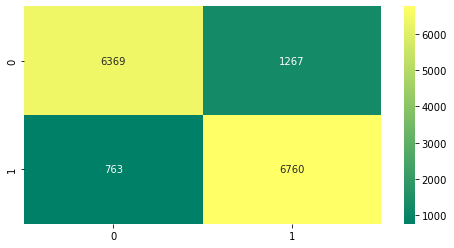

In [204]:
model_prediction(ExtraTreesClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 76.4539568548729
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 77.54469292169668

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.7679895901106051
Recall Score of AdaBoostClassifier() model is: 0.7845274491559219
F1 Score of AdaBoostClassifier() model is: 0.7761704366123093

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


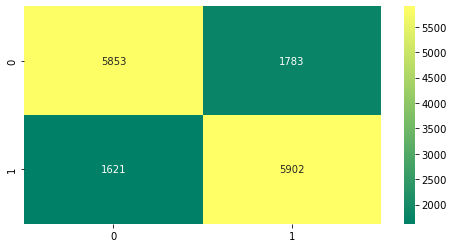

In [205]:
model_prediction(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 77.42655998190506
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 78.22415726631044

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7790113666402326
Recall Score of GradientBoostingClassifier() model is: 0.7834640435996278
F1 Score of GradientBoostingClassifier() model is: 0.7812313605938102

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


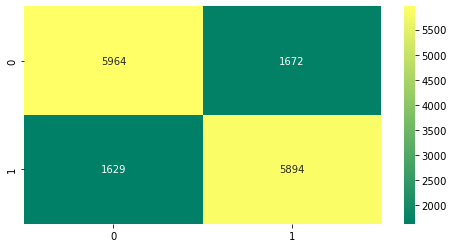

In [206]:
model_prediction(GradientBoostingClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 85.29220503831039
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_st

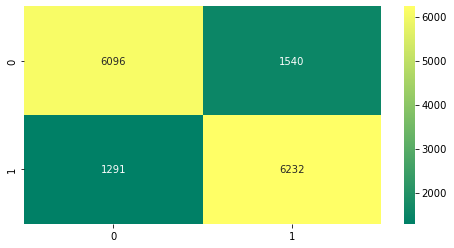

In [207]:
model_prediction(XGBClassifier())

In [208]:
models = ["Logistic Regression","SVM","Decision Tree","Random Forest","Extra Tree","Ada Boost",
          "Gradient Boost","XGBoost"]

In [209]:
df5 = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [210]:
df5

,Algorithms,Training Score,Testing Score
0,Logistic Regression,72.179027,73.355762
1,SVM,73.609658,74.820239
2,Decision Tree,100.000000,82.835279
3,Random Forest,100.000000,86.146843
4,Extra Tree,100.000000,86.608615
5,Ada Boost,76.453957,77.544693
6,Gradient Boost,77.426560,78.224157
7,XGBoost,85.292205,81.324626


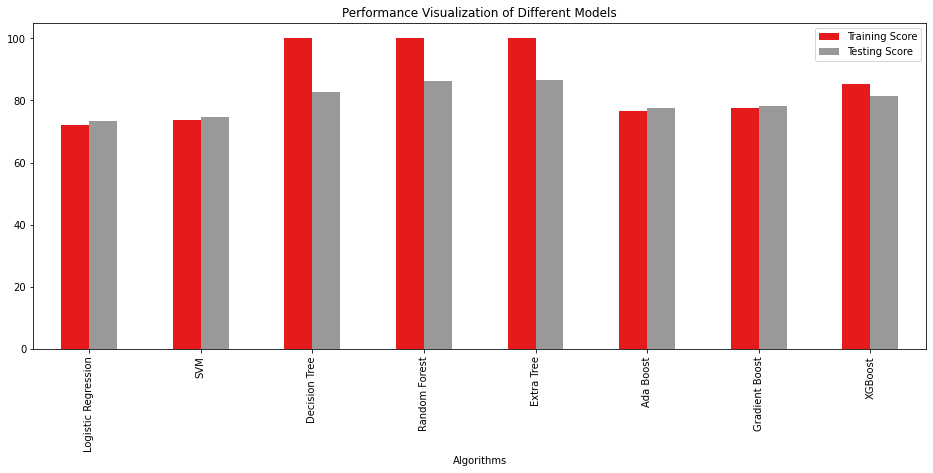

In [211]:
df5.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

### Cross validation

In [212]:
from sklearn.model_selection import cross_val_score

In [213]:
# checking cv score for logistic Regression
score = cross_val_score(LogisticRegression(),x,y)
print(score)
print(score.mean())
print(testing_score[0]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[0]/100)- score.mean())

[0.72501484 0.72343162 0.72234316 0.73419099 0.7220188 ]
0.7253998854105903
0.733557622534468
Differnet between Accuracy score and cross validation score is-  0.008157737123877684


In [214]:
# checking cv score for SVC
score = cross_val_score(SVC(),x,y)
print(score)
print(score.mean())
print(testing_score[1]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[1]/100)- score.mean())

[0.738868   0.73679003 0.74025331 0.74507669 0.74082138]
0.7403618820120772
0.7482023880203179
Differnet between Accuracy score and cross validation score is-  0.00784050600824071


In [215]:
# checking cv score for DecisionTreeClassifier
score = cross_val_score(DecisionTreeClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[2]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[2]/100)- score.mean())

[0.82940827 0.83346527 0.82911142 0.83354775 0.83166749]
0.83144003988205
0.8283527937199024
Differnet between Accuracy score and cross validation score is-  -0.0030872461621475056


In [216]:
# checking cv score for RandomForestClassifier
score = cross_val_score(RandomForestClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[3]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[3]/100)- score.mean())

[0.85968731 0.86611914 0.86611914 0.87075705 0.87036121]
0.8666087694094259
0.8614684345933109
Differnet between Accuracy score and cross validation score is-  -0.0051403348161149776


In [217]:
# checking cv score for ExtraTreesClassifier
score = cross_val_score(ExtraTreesClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[4]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[4]/100)- score.mean())

[0.87314467 0.86394221 0.86859292 0.87204354 0.86828303]
0.8692012730372255
0.8660861534402006
Differnet between Accuracy score and cross validation score is-  -0.003115119597024929


In [218]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(AdaBoostClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[5]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[5]/100)- score.mean())

[0.76063725 0.76202256 0.76311102 0.77328055 0.76437407]
0.7646850911265866
0.7754469292169668
Differnet between Accuracy score and cross validation score is-  0.010761838090380227


In [219]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GradientBoostingClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[6]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[6]/100)- score.mean())

[0.7698397  0.77221453 0.77102711 0.78248392 0.77585354]
0.7742837589047439
0.7822415726631045
Differnet between Accuracy score and cross validation score is-  0.007957813758360577


In [220]:
# checking cv score for XGBClassifier
score = cross_val_score(XGBClassifier(),x,y)
print(score)
print(score.mean())
print(testing_score[7]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[7]/100)- score.mean())

[0.80150406 0.80694637 0.81258658 0.81434933 0.81603167]
0.8102836014446766
0.8132462563493634
Differnet between Accuracy score and cross validation score is-  0.0029626549046868345


XGBClassifier,ExtraTreesClassifier,RandomForestClassifier have least score difference and max accuracy

## Hyperparameter tuning

In [221]:
from sklearn.model_selection import GridSearchCV

#### XGBClassifier

In [222]:
model1 = XGBClassifier()
parameters1 ={'max_depth':[3,5,7],
           'gamma':[.01,.1,.2],
           'learning_rate':[.005,.01,.02],
           'n_estimators':[50,100,150]}

grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)
grid_search1.fit(x_train,y_train)
grid_search1.best_score_

0.7804294453244389

In [223]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'gamma': 0.1, 'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 150}

In [224]:
model1=XGBClassifier(gamma= 0.2, learning_rate= 0.02, max_depth = 7, n_estimators= 150)

In [225]:
model1.fit(x_train,y_train)

x_test_pred1 = model1.predict(x_test)

accuracy_score(y_test,x_test_pred1)

0.7950392506101985

#### RandomForestClassifier

In [226]:
model2 = RandomForestClassifier()
parameters2 ={'n_estimators':[50,75,100],
             'criterion':['gini','entropy', 'log_loss'],
             'max_features':['sqrt', 'log2', None],
             'random_state':[120,150,None]
             }
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)
grid_search2.fit(x_train,y_train)
grid_search2.best_score_


0.8550710728990026

In [227]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'criterion': 'entropy',
 'max_features': None,
 'n_estimators': 100,
 'random_state': None}

In [228]:
model2 = RandomForestClassifier(**best_parameters2)

In [229]:
model2.fit(x_train,y_train)

x_test_pred2 = model2.predict(x_test)

accuracy_score(y_test,x_test_pred2)

0.8636453591925589

#### ExtraTreesClassifier

In [230]:
model3 = ExtraTreesClassifier()
parameters3 ={'n_estimators':[75,100,125],
             'criterion':['gini','entropy', 'log_loss'],
             'max_features':['sqrt', 'log2', None],
             'random_state':[120,150,None]
             }
grid_search3 = GridSearchCV(model3, parameters3, cv=5, n_jobs=-1)
grid_search3.fit(x_train,y_train)
grid_search3.best_score_


0.8563997946852648

In [231]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 125,
 'random_state': 120}

In [232]:
model3 = ExtraTreesClassifier(**best_parameters3)

In [233]:
model3.fit(x_train,y_train)

x_test_pred3 = model3.predict(x_test)

accuracy_score(y_test,x_test_pred3)

0.8658882512039052

### Roc auc

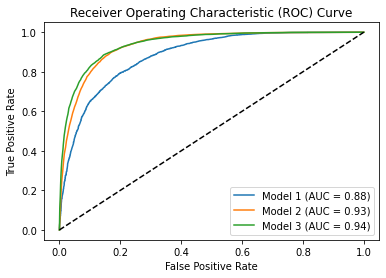

AUC Score for Model 1: 0.7951040852055792
AUC Score for Model 2: 0.8639254670520793
AUC Score for Model 3: 0.8661370104614401


In [234]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

# Calculate and plot ROC curve for model1
y_pred_prob1 = model1.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label='Model 1 (AUC = %0.2f)' % roc_auc1)

# Calculate and plot ROC curve for model2
y_pred_prob2 = model2.predict_proba(x_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='Model 2 (AUC = %0.2f)' % roc_auc2)

# Calculate and plot ROC curve for model3
y_pred_prob3 = model3.predict_proba(x_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='Model 3 (AUC = %0.2f)' % roc_auc3)

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC scores
auc_score1 = roc_auc_score(y_test, model1.predict(x_test))
print('AUC Score for Model 1:', auc_score1)

auc_score2 = roc_auc_score(y_test, model2.predict(x_test))
print('AUC Score for Model 2:', auc_score2)

auc_score3 = roc_auc_score(y_test, model3.predict(x_test))
print('AUC Score for Model 3:', auc_score3)


### Saving the model

In [235]:
# Saving the model using .pkl
import joblib
joblib.dump(model3,"Banking.pkl")

['Banking.pkl']

In [236]:
# Let's load the saved model and get the predictions
model=joblib.load("Banking.pkl")

In [237]:
# Prediction
prediction=model.predict(x_test)

In [238]:
a=np.array(y_test)
df5=pd.DataFrame()
df5['Predicted']=prediction
df5['Original']=a
df5

,Predicted,Original
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
15154,1,0
15155,1,1
15156,0,0
15157,0,0


In [239]:
prediction2=model.predict(df_test)
df6=pd.DataFrame()
df6['Predicted']=prediction2
df6

,Predicted
0,0
1,1
2,0
3,0
4,0
...,...
12029,0
12030,0
12031,0
12032,0
